In [1]:
#SSIM --> Structural Similar Index Measure

from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2

# Image Similarity




Image similarity refers to the degree to which two or more images are similar or alike. It can be evaluated based on various factors, such as color, texture, shape, and content. Image similarity can be measured using various techniques, including feature extraction, clustering, and classification.

Feature extraction involves identifying relevant features of an image, such as edges, corners, or color histograms, and using them to compute a similarity score between two images. Clustering involves grouping similar images into clusters, based on their features or content, and can be used to identify images that are most similar to a given query image. Classification involves training a machine learning model to predict the similarity between pairs of images based on a set of labeled training data.

Image similarity can be useful in a variety of applications, such as image retrieval, content-based image analysis, and object recognition. It can help to automate tasks such as image organization, categorization, and tagging, and can also be used to identify images that may be duplicates or near-duplicates.

# Define Function

In [2]:
def mean_squared_error(image01, image02):
    error = np.sum((image01.astype("float") - image02.astype("float"))**2)
    error = error/float(image01.shape[0] * image02.shape[1])
    return error

"""
error = np.sum((image01.astype("float") - image02.astype("float"))**2)
error = error/float(image01.shape[0] * image02.shape[1])
return error


"""



def image_comparision(image01, image02): 
    m = mean_squared_error(image01, image02) 
    s = ssim(image01, image02)
    print("Mean Squared Error is {}\n Structural Similarity Index Measure is : {}".format(m, s))

In [3]:
image01 = cv2.imread("../input/catimage/Cat.jpg")
image02 = cv2.imread("../input/catimageds/CatImage.jpg")

In [4]:
image01 = cv2.cvtColor(image01, cv2.COLOR_BGR2GRAY)           # Color Convert
image02 = cv2.cvtColor(image02, cv2.COLOR_BGR2GRAY)

In [5]:
image_comparision(image01, image01)                   #Color Convert between Same Image

Mean Squared Error is 0.0
 Structural Similarity Index Measure is : 1.0


In [6]:
image_comparision(image02, image02)                 # #Color Convert between Same Image

Mean Squared Error is 0.0
 Structural Similarity Index Measure is : 1.0


In [7]:
image02.shape

(1500, 1000)

In [8]:
tuple(np.array(image02.shape[1::-1])/2)

(500.0, 750.0)

This line of code uses the OpenCV library to create a 2D rotation matrix called **"image_rotation"**. The matrix is created based on three parameters:

* **"image_center"** - the center point of the image that will be rotated. This is usually defined as the center point of the image dimensions, which can be calculated by dividing the width and height by two.

* **"image_angle"** - the angle in degrees that the image will be rotated. A positive angle rotates the image clockwise, while a negative angle rotates the image counterclockwise.

* **"1.0"** - the scale factor of the rotated image. A value of 1.0 means that the image will be rotated at its original size, while values greater than 1.0 will scale up the image, and values less than 1.0 will scale down the image.

Once the rotation matrix is created, it can be applied to the image using the OpenCV function "cv2.warpAffine()". This will create a new image that has been rotated according to the specified angle and scale factor.




This line of code also uses the OpenCV library to apply the 2D rotation matrix **"image_rotation"** to the input image **"image02"**. The resulting rotated image is stored in a variable called **"imageWrap"**.

The function **"cv2.warpAffine()"** takes several parameters:

* **"image02"** - the input image that will be rotated.
* **"image_rotation"** - the 2D rotation matrix that will be used to rotate the image.
* **"image02.shape[1::-1]"** - a tuple specifying the output image size. In this case, it is set to the same size as the input image, so the output image will have the same dimensions as the input image.
* **"flags"** - an optional parameter that specifies the interpolation method to be used when mapping the pixels of the input image to the output image. In this case, it is set to "cv2.INTER_LINEAR", which is a bilinear interpolation method that produces smooth output images.
After the rotation is applied, the resulting rotated image is stored in the "imageWrap" variable, which can be used for further processing or display.

In [9]:
image_angle = 45
image_center = tuple(np.array(image02.shape[1::-1])/2)
image_rotation = cv2.getRotationMatrix2D(image_center, image_angle, 1.0)
imageWrap = cv2.warpAffine(image02, image_rotation,image02.shape[1::-1], flags = cv2.INTER_LINEAR )

In [10]:
imageWrap[230]

array([ 58,  59,  60,  60,  61,  62,  62,  64,  64,  64,  65,  66,  66,
        66,  67,  67,  67,  68,  68,  69,  70,  70,  70,  71,  71,  71,
        72,  73,  74,  74,  74,  75,  75,  76,  76,  77,  78,  78,  79,
        79,  80,  80,  80,  80,  81,  81,  81,  81,  82,  82,  83,  83,
        82,  83,  83,  83,  83,  83,  83,  83,  84,  84,  84,  84,  84,
        85,  86,  87,  87,  87,  87,  87,  87,  88,  88,  88,  89,  89,
        89,  90,  90,  90,  91,  91,  92,  92,  92,  93,  93,  93,  94,
        94,  94,  95,  95,  97,  98,  98,  98,  99,  99,  99, 100, 100,
       101, 101, 102, 103, 103, 103, 103, 103, 103, 104, 104, 104, 104,
       104, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 107, 107,
       107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 106, 107, 107,
       106, 107, 107, 107, 107, 107, 108, 108, 107, 107, 107, 107, 108,
       108, 108, 108, 108, 108, 109, 109, 108, 108, 108, 108, 108, 108,
       108, 108, 109, 109, 109, 109, 109, 110, 110, 111, 111, 11

In [11]:
cv2.imwrite("../working/AugmentedImage.jpg",imageWrap)     #image Save

True

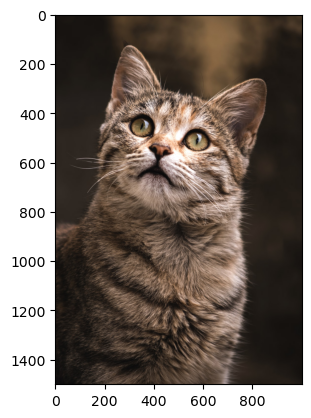

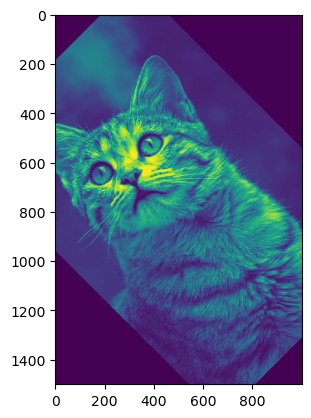

In [12]:
import matplotlib.pyplot as plt
img = plt.imread("../working/AugmentedImage.jpg")                   #Save Image Read
img2 = plt.imread("../input/catimageds/CatImage.jpg")
plt.imshow(img2)
plt.show()
plt.imshow(img)
plt.show()

# Image Comparison

In [13]:
img = cv2.imread("../working/AugmentedImage.jpg")
img2 = cv2.imread("../input/catimageds/CatImage.jpg")
image01 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image02 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
image_comparision(image01, image02)

Mean Squared Error is 3907.006502
 Structural Similarity Index Measure is : 0.22366785664825323


# AverageBlur

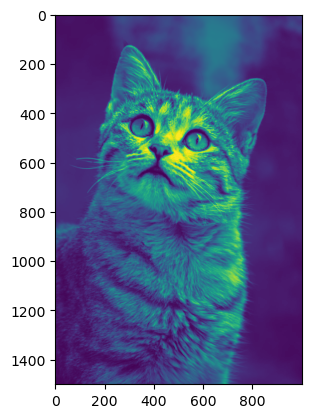

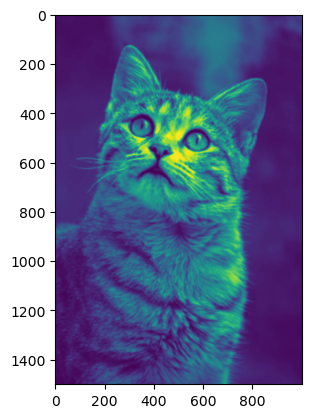

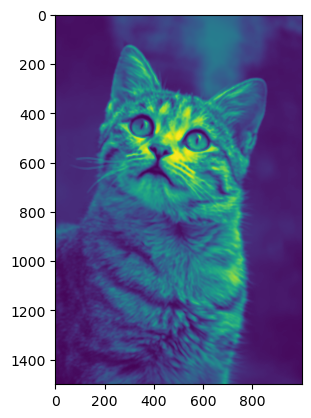

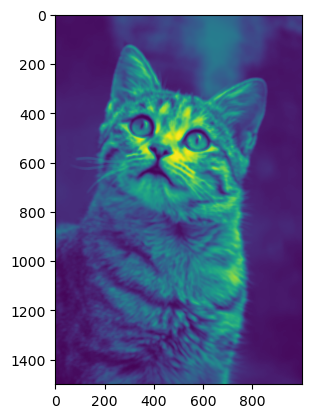

In [14]:
# image01 = cv2.blur(image02, (3, 3))
# image012 = cv2.blur(image02, (7, 7))
# image013 = cv2.blur(image02, (9, 9))
# image014 = cv2.blur(image02, (11, 11))
# plt.imshow(image01)
# plt.show()
# plt.imshow(image012)
# plt.show()
# plt.imshow(image013)
# plt.show()
# plt.imshow(image014)
# plt.show()



image01 = cv2.blur(image02, (3, 3))
image012 = cv2.blur(image02, (7, 7))
image013 = cv2.blur(image02, (9, 9))
image014 = cv2.blur(image02, (11, 11))

plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()


# GaussianBlur

GaussianBlur is a common filter used in image processing to blur an image. The filter works by convolving the image with a Gaussian function, which is a bell-shaped curve that describes the distribution of values in a normal distribution.

The purpose of the GaussianBlur filter is to smooth out the image and reduce noise. The amount of blur is controlled by the standard deviation of the Gaussian function, which determines the width of the bell curve. A larger standard deviation results in a wider and smoother blur, while a smaller standard deviation produces a narrower and more detailed blur.

The GaussianBlur filter is often used as a preprocessing step in image processing tasks such as edge detection, object recognition, and image segmentation. It can also be used for artistic effects, such as creating a shallow depth of field or a soft-focus effect.

In Python, the GaussianBlur filter can be applied using the OpenCV library or the scipy.ndimage library. In OpenCV, the filter is implemented using the cv2.GaussianBlur() function, while in scipy.ndimage, it is implemented using the gaussian_filter() function.

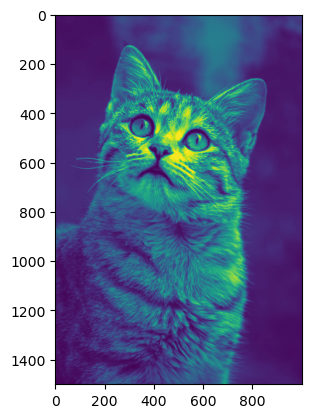

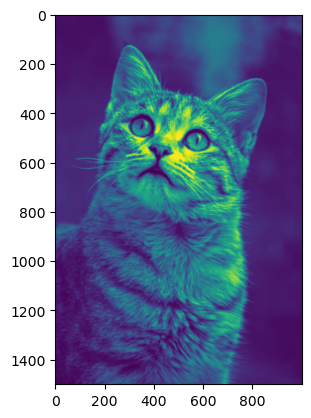

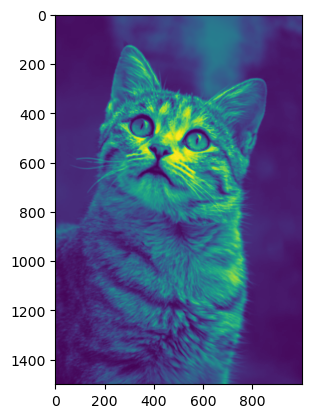

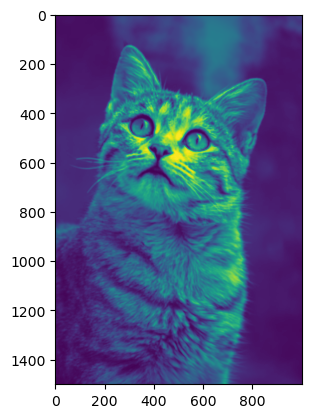

In [15]:
image01 = cv2.GaussianBlur(image02, (3, 3), 0)
image012 = cv2.GaussianBlur(image02, (7, 7), 0)
image013 = cv2.GaussianBlur(image02, (9, 9), 0)
image014 = cv2.GaussianBlur(image02, (11, 11), 0)
plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()


# MedianBlur

MedianBlur is a filter commonly used in image processing to reduce noise in an image. The filter works by replacing each pixel value with the median value of its neighboring pixels within a specified window size.

The purpose of the MedianBlur filter is to remove noise in an image while preserving the edges and details of the image. Unlike the GaussianBlur filter, which uses a weighted average of neighboring pixels, the MedianBlur filter replaces each pixel value with the median value of the pixels within the specified window size. This makes it particularly effective at removing salt-and-pepper noise, which appears as isolated pixels with very high or very low intensity values.

In Python, the MedianBlur filter can be applied using the OpenCV library. The cv2.medianBlur() function takes the input image and the size of the window to be used for the median filter as input arguments. The window size must be an odd integer value, as the median value is computed from the pixels within the window centered at each pixel.

The MedianBlur filter is often used as a preprocessing step in image processing tasks such as image segmentation, edge detection, and object recognition. It can also be used for artistic effects, such as creating a painterly or impressionistic style to an image.



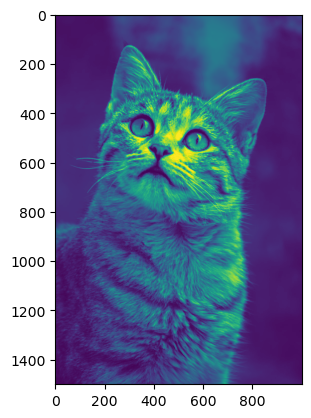

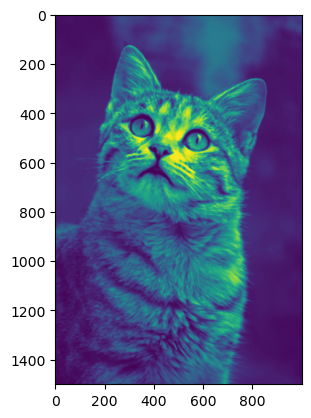

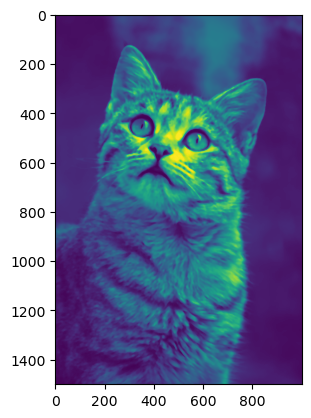

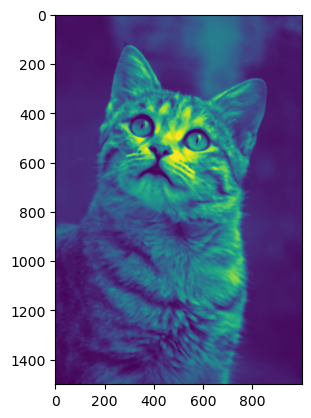

In [16]:
image01 = cv2.medianBlur(image02,  3)
image012 = cv2.medianBlur(image02,  7)
image013 = cv2.medianBlur(image02, 9)
image014 = cv2.medianBlur(image02, 11)
plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()
